To run each step, put your cursor in the box and click the "Run" button.

Start by loading some Python libraries.

In [1]:
%matplotlib inline

In [26]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

## C&O 10.25

Verify that the basic equations of stellar structure [Eqs. (10.6), (10.7), (10.36), (10.68)] are satisfied by the 1 M$_\odot$ StatStar model.

1. First, run the 1 M$_\odot$ model. Use L = 0.86071 L$_\odot$, T = 5500.2 K, X = 0.7, and Z = 0.008.

In [3]:
from statstar import StatStar

 Enter the mass of the star (in solar units):1.0
 Enter the luminosity of the star (in solar units):0.86071
 Enter the effective temperature of the star (in K):5500.2
 Enter the mass fraction of hydrogen (X):0.7
 Enter the mass fraction of metals (Z):0.008
CONGRATULATIONS, I THINK YOU FOUND IT!
However, be sure to look at your model carefully.
***** The integration has been completed *****
      The model has been stored in starmodl_py.dat


In case you messed up the first run, you can run StatStar again, specifying the correct parameters from the command line:

In [4]:
StatStar(1.,0.86071,5500.2,0.7,0.008)

CONGRATULATIONS, I THINK YOU FOUND IT!
However, be sure to look at your model carefully.
***** The integration has been completed *****
      The model has been stored in starmodl_py.dat


(0, 0, 423)

2. Copy the results to a new file, and then peruse the results. The output table lists the following quantities:
- r, stellar radius in meters
- Qm, a dimensionless measure of mass, where Qm $\equiv$ 1.0 - M$_r$/M$_\mathrm{tot}$ (see Notes)
- L$_r$, interior luminosity in Watts
- T, temperature in K
- P, pressure in Pascals
- rho, mass density in kg/m$^3$
- kap(pa), opacity
- eps(ilon), energy generation rate W/kg
- whether the energy transport is dominated by radiation (r) or convection (c)
- dlnP/dlnT, the gradient of ln(P) -- natural log of P -- with ln(T)

In [6]:
mv starmodl_py.dat starmodl_1p0.dat

In [7]:
model1p0 = pd.read_csv('starmodl_1p0.dat', comment='#', sep='\s+')
header1p0 = pd.read_csv('starmodl_1p0.dat', nrows=15, header=None, names=['Header'])
for i in range(15):
    print(header1p0['Header'][i])
model1p0

# A Homogeneous Main-Sequence Model
# The surface conditions are:        The central conditions are:
# Mtot =  1.000000E+00 Msun          Mc/Mtot     =  4.00418E-04
# Rtot =  1.020998E+00 Rsun          Rc/Rtot     =  1.90000E-02
# Ltot =  8.607100E-01 Lsun          Lc/Ltot     =  7.67225E-02
# Teff =  5.500200E+03 K             Density     =  7.72529E+01
# X    =  7.000000E-01               Temperature =  1.41421E+07
# Y    =  2.920000E-01               Pressure    =  1.46284E+17 dynes/cm**2
# Z    =  8.000000E-03               epsilon     =  3.17232E+02 ergs/s/g
#                                    dlnP/dlnT   =  2.49808E+00
# Notes:
# (1) Mass is listed as Qm = 1.0 - M_r/Mtot
# (2) Convective zones are indicated by c
# (3) dlnP/dlnT may be limited to +99.9 or -99.9# if so it is
# labeled by *


,r,Qm,L_r,T,P,rho,kap,eps,r/c,dlPdlT
0,1.350000e+09,1.000000e+00,2.530000e+32,14000000.0,1.450000e+17,7.720000e+01,1.40,1.510000e+01,c,2.5
1,2.060000e+09,9.990000e-01,2.830000e+32,13900000.0,1.430000e+17,7.660000e+01,1.42,1.460000e+01,c,2.5
2,2.770000e+09,9.970000e-01,3.400000e+32,13800000.0,1.400000e+17,7.570000e+01,1.44,1.390000e+01,c,2.5
3,3.480000e+09,9.930000e-01,4.280000e+32,13700000.0,1.360000e+17,7.450000e+01,1.46,1.310000e+01,c,2.5
4,4.190000e+09,9.880000e-01,5.510000e+32,13500000.0,1.320000e+17,7.310000e+01,1.49,1.210000e+01,c,2.5
...,...,...,...,...,...,...,...,...,...,...
419,7.080000e+10,1.180000e-11,3.290000e+33,13200.0,6.640000e+03,3.720000e-09,130.00,5.650000e-64,r,4.8
420,7.080000e+10,3.400000e-12,3.290000e+33,9880.0,1.660000e+03,1.240000e-09,148.00,1.200000e-70,r,4.9
421,7.090000e+10,6.080000e-13,3.290000e+33,6580.0,2.260000e+02,2.520000e-10,172.00,3.790000e-81,r,4.8
422,7.100000e+10,3.940000e-14,3.290000e+33,3290.0,7.970000e+00,1.750000e-11,230.00,1.670000e-102,r,4.2


3. Find two adjacent shells at temperatures near $5\times10^6$ K.

In [6]:
model1p0[30:40]

,r,Qm,L_r,T,P,rho,kap,eps,r/c,dlPdlT
30,2.270000e+10,0.324,3.290000e+33,6080000.0,8.970000e+15,11.00,3.90,0.03820,r,4.1
31,2.340000e+10,0.299,3.290000e+33,5850000.0,7.690000e+15,9.82,4.01,0.02750,r,4.1
32,2.410000e+10,0.275,3.290000e+33,5630000.0,6.590000e+15,8.73,4.12,0.01980,r,4.1
33,2.480000e+10,0.253,3.290000e+33,5430000.0,5.630000e+15,7.75,4.24,0.01410,r,4.2
34,2.550000e+10,0.233,3.290000e+33,5220000.0,4.810000e+15,6.87,4.35,0.01000,r,4.2
35,2.620000e+10,0.213,3.290000e+33,5030000.0,4.100000e+15,6.08,4.46,0.00710,r,4.2
36,2.690000e+10,0.195,3.290000e+33,4840000.0,3.490000e+15,5.38,4.58,0.00500,r,4.2
37,2.760000e+10,0.178,3.290000e+33,4660000.0,2.970000e+15,4.75,4.69,0.00350,r,4.3
38,2.840000e+10,0.162,3.290000e+33,4480000.0,2.520000e+15,4.20,4.81,0.00244,r,4.3
39,2.910000e+10,0.148,3.290000e+33,4320000.0,2.140000e+15,3.70,4.92,0.00170,r,4.3


4. Using these two shells, numerically compute the derivatives on the left-hand sides of the stellar structure equations. For example:

    $\frac{dP}{dr} \approx \frac{P_{i+1} - P_i}{r_{i+1} - r_i}$


5. Compare the results with the values on the right-hand sides of the equations using average values of quantities for the two zones (e.g., $M_r = (M_i+M_{i+1})/2$). Compute percent differences between the two sides of each equation. Assume complete ionization, X = 0.7, Y = 0.292, and Z = 0.008.

## C&O 10.26

Now, build a second main-sequence star with a mass of 0.75 M$_\odot$ that has a homogeneous composition of X = 0.7, Y = 0.292, and Z = 0.008. For these values, the model's luminosity and effective temperature are 0.189 L$_\odot$ and 3851.55 K, respectively. Compare the central temperatures, pressures, densities, and energy generation rates between the 1.0 M$_\odot$ and 0.75 M$_\odot$ models. Explain the differences in the central conditions of the two models.

In [8]:
StatStar(0.75,0.189,3851.55,0.7,0.008)

CONGRATULATIONS, I THINK YOU FOUND IT!
However, be sure to look at your model carefully.
***** The integration has been completed *****
      The model has been stored in starmodl_py.dat


(0, 0, 425)

In [9]:
mv starmodl_py.dat starmodl_0p75.dat

In [10]:
header0p75 = pd.read_csv('starmodl_0p75.dat', nrows=15, header=None, names=['Header'])
model0p75 = pd.read_csv('starmodl_0p75.dat', comment='#', sep='\s+')
for i in range(15):
    print(header0p75['Header'][i])
model0p75

# A Homogeneous Main-Sequence Model
# The surface conditions are:        The central conditions are:
# Mtot =  7.500000E-01 Msun          Mc/Mtot     =  2.97025E-04
# Rtot =  9.756933E-01 Rsun          Rc/Rtot     =  1.70000E-02
# Ltot =  1.890000E-01 Lsun          Lc/Ltot     =  6.03622E-02
# Teff =  3.851550E+03 K             Density     =  6.87551E+01
# X    =  7.000000E-01               Temperature =  1.11276E+07
# Y    =  2.920000E-01               Pressure    =  1.02441E+17 dynes/cm**2
# Z    =  8.000000E-03               epsilon     =  9.85106E+01 ergs/s/g
#                                    dlnP/dlnT   =  2.49876E+00
# Notes:
# (1) Mass is listed as Qm = 1.0 - M_r/Mtot
# (2) Convective zones are indicated by c
# (3) dlnP/dlnT may be limited to +99.9 or -99.9# if so it is
# labeled by *


,r,Qm,L_r,T,P,rho,kap,eps,r/c,dlPdlT
0,1.150000e+09,1.000000e+00,4.360000e+31,11000000.0,1.020000e+17,6.870000e+01,2.53,4.690000e+00,c,2.5
1,1.830000e+09,9.990000e-01,4.980000e+31,11000000.0,1.000000e+17,6.810000e+01,2.56,4.540000e+00,c,2.5
2,2.510000e+09,9.970000e-01,6.200000e+31,10900000.0,9.830000e+16,6.730000e+01,2.59,4.340000e+00,c,2.5
3,3.190000e+09,9.940000e-01,8.150000e+31,10800000.0,9.590000e+16,6.630000e+01,2.64,4.080000e+00,c,2.5
4,3.870000e+09,9.890000e-01,1.090000e+32,10700000.0,9.290000e+16,6.510000e+01,2.71,3.790000e+00,c,2.5
...,...,...,...,...,...,...,...,...,...,...
421,6.760000e+10,1.140000e-11,7.230000e+32,10300.0,4.300000e+03,3.090000e-09,262.00,3.270000e-69,r,4.8
422,6.770000e+10,3.290000e-12,7.230000e+32,7750.0,1.080000e+03,1.030000e-09,298.00,2.070000e-76,r,4.9
423,6.780000e+10,5.910000e-13,7.230000e+32,5160.0,1.470000e+02,2.100000e-10,347.00,9.560000e-88,r,4.8
424,6.780000e+10,3.920000e-14,7.230000e+32,2580.0,5.260000e+00,1.490000e-11,473.00,8.300000e-111,r,4.2


## C&O 10.27

(a) Plot P versus r, M$_r$ versus r, L$_r$ versus r, and T versus r for the 1 M$_\odot$ model.

/Users/drupke/opt/anaconda3/envs/astroconda/lib/python3.6/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


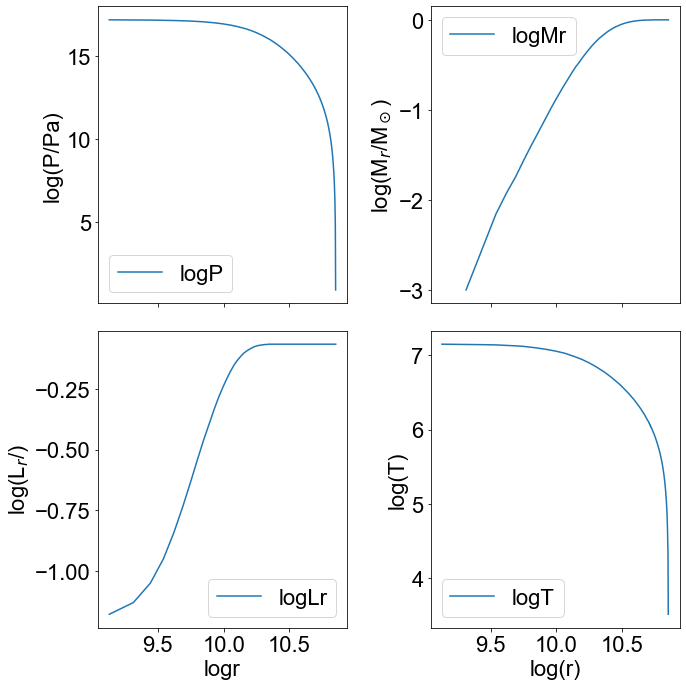

In [36]:
model1p0['logT'] = np.log10(model1p0['T'])
model1p0['logLr'] = np.log10(model1p0['L_r']/3.826e33)
model1p0['logMr'] = np.log10(1. * (1. - model1p0['Qm']))
model1p0['logP'] = np.log10(model1p0['P'])
model1p0['logr'] = np.log10(model1p0['r'])

font = {'family' : 'Arial',
        'weight' : 'normal',
        'size'   : 22}
matplotlib.rc('font', **font)

fig, axs = plt.subplots(2,2, sharex=True, figsize=(10,10))
P_v_R_1p0 = model1p0.plot(ax=axs[0,0], x='logr',y='logP', ylabel='log(P/Pa)')
Mr_v_R_1p0 = model1p0.plot(ax=axs[0,1], x='logr',y='logMr', ylabel='log(M$_r$/M$_\odot$)')
Lr_v_R_1p0 = model1p0.plot(ax=axs[1,0], x='logr',y='logLr', ylabel='log(L$_r$/)')
T_v_R_1p0 = model1p0.plot(ax=axs[1,1], x='logr',y='logT', ylabel='log(T)', xlabel='log(r)')
fig.tight_layout()

#for ax in fig.get_axes():
#    ax.label_outer()
#P_v_R_1p0.set_ylabel('log[ Pressure / N/m**2 ]')